# MAT 186: Forward Euler vs. Backward Euler

In [1]:
import numpy as np

import matplotlib.pyplot as plt

# this makes sure the images don't come out looking muddy on 
# retina displays (which your computer probably uses)
%config InlineBackend.figure_format='retina'

In this demo, we solve the IVP 

\begin{equation*}
        \left\{
            \begin{aligned}
            x'(t) &= -15x(t)
            \\ \\
            x(0) &= 1. 
            \end{aligned}
            \right. 
        \end{equation*}
        
numerically using both the forward and backward Euler methods. Since we know the unique solution to this IVP is 

$$
x(t) = e^{-15t},
$$

we can compare the error in the two approximations easily. 

This demo is based on the nice example on the following Wikipedia page: https://en.wikipedia.org/wiki/Stiff_equation

In [13]:
# code for forward Euler applied to this particular problem
def f_euler(T, dt, x0=1):
    # T = time to stop simulation at
    # dt = time-step size
    # x0 = initial condition 
    n = int(T/dt)
    
    # initialize output (sequence of guess at each time step)
    out = np.zeros(n+1, dtype=float)
    
    # put in initial condition
    out[0] = x0
    
    # now do each Euler step 
    for k in range(1,n+1):
        
        out[k] = (1.-15.*dt)*out[k-1]
    
    return out 

# code for backward Euler applied to this particular problem. Essentially the same 
# as the forward case, except the time-step looks a bit different
def b_euler(T, dt, x0=1):
    n = int(T/dt)
    
    out = np.zeros(n+1, dtype=float)
    
    out[0] = x0
    
    for k in range(1,n+1):
        
        out[k] = ((1.+15.*dt)**(-1))*out[k-1]
    
    return out 

In [14]:
# specify parameters 
dt = 2**-3
T = 1.

# do the time-stepping for both methods 
f_sim = f_euler(T, dt)
b_sim = b_euler(T, dt)

# create array of time-steps for plotting approximate solns
n = int(T/dt)
t = np.linspace(0,T,n+1)

# need a finer array of time-steps for plotting the exact soln
tt = np.linspace(0,T,100)

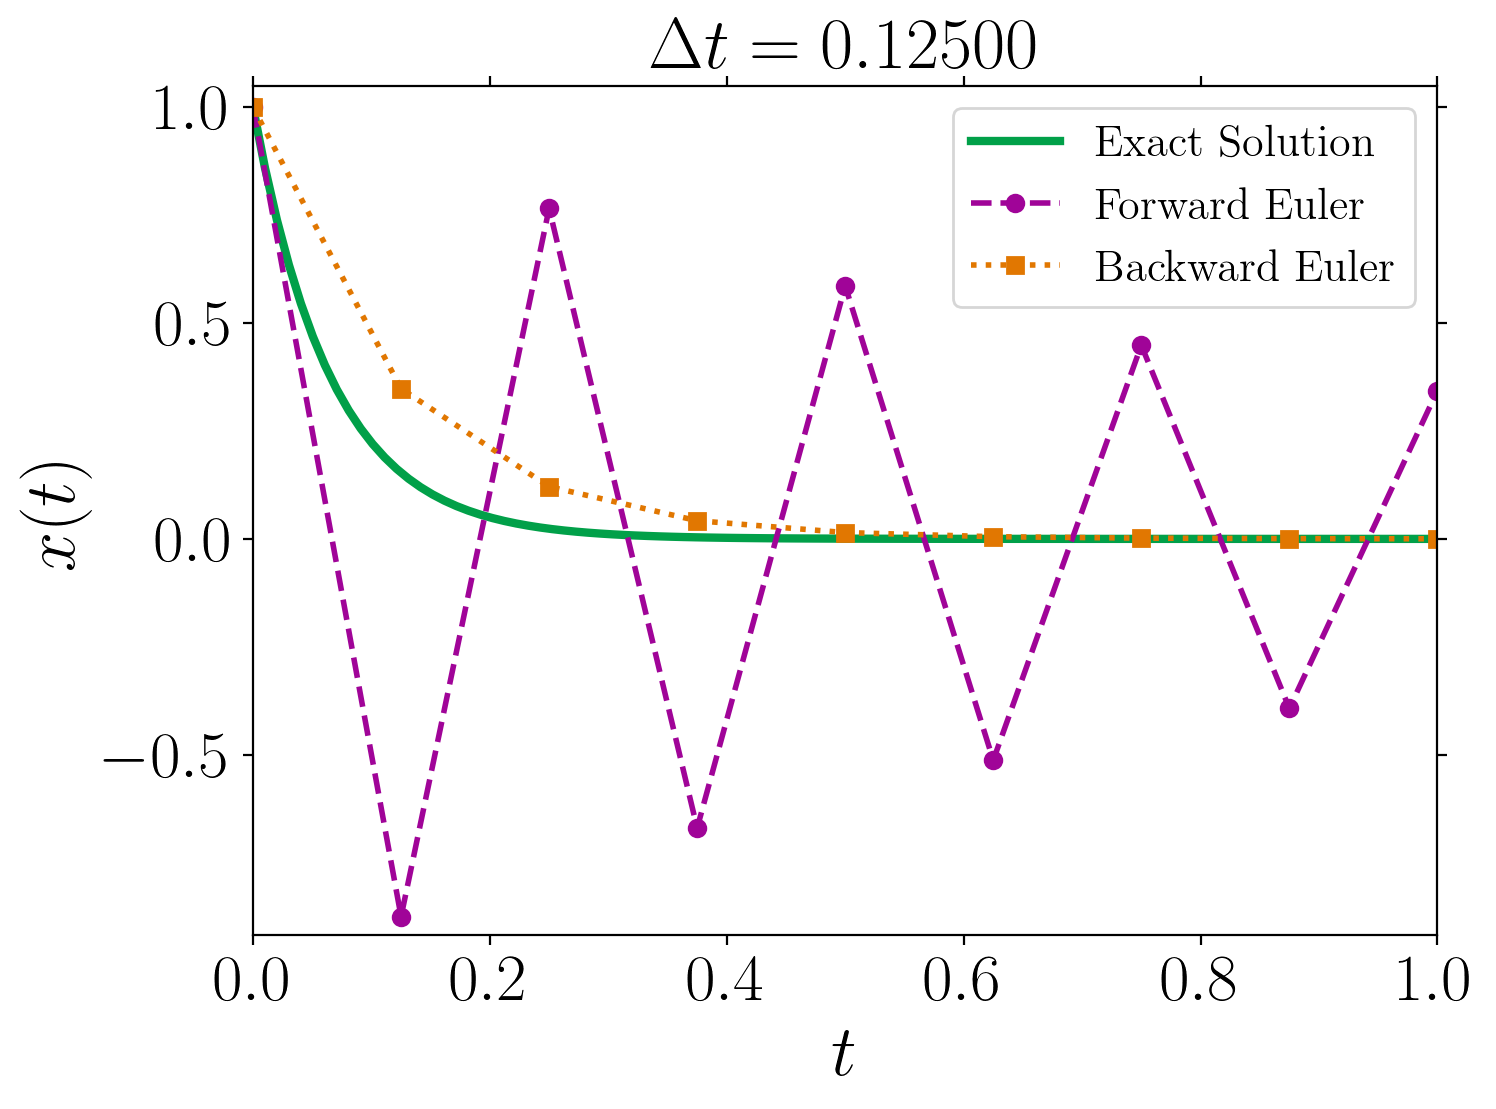

In [15]:
# plot results on the same axes, together w/ the exact solution
fig, ax = plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#plt.rcParams['figure.dpi']= 600

plt.plot(tt, np.exp(-15.*tt), color='xkcd:emerald', linestyle='solid', label='Exact Solution', linewidth=3)
plt.plot(t, f_sim, 'o--', color='xkcd:barney purple', label='Forward Euler', linewidth=2)
plt.plot(t, b_sim, 's:', color='xkcd:pumpkin', label='Backward Euler', linewidth=2)

ax.legend(fontsize=16)

plt.xlim([0,T])
plt.ylim([1.05*np.amin(f_sim),1.05*np.amax(f_sim) ])

textcolor = 'k'

plt.xlabel(r"$t$", fontsize=26, color = textcolor)
plt.ylabel(r"$x(t)$", fontsize=26, color=textcolor)

plt.tick_params(axis='x', which='both', top='off', color = textcolor)
plt.xticks(fontsize=24, rotation=0, color = textcolor)
plt.tick_params(axis='y', which='both', right='off', color = textcolor)
plt.yticks(fontsize=24, rotation=0, color = textcolor)
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=6)

plt.title('$\Delta t = %.5f$' % dt, fontsize=26)

plt.tight_layout()

fig.set_size_inches(8, 6)

#ax.axes.set_aspect(scaled)
#plt.savefig('stiff_sim_dt=%.3f' % dt + '.jpg', dpi=700)

plt.show()

I encourage you to try running the code for various $\Delta t$!

For relatively large $\Delta t$, you should find that backward Euler definitely beats forward Euler by a huge margin! When $\Delta t$ becomes very small (say, $<2^{-5}$), the difference between the two methods becomes less noticeable. 

We can also confirm this by plotting the absolute error for both methods as a function of $\Delta t$: 

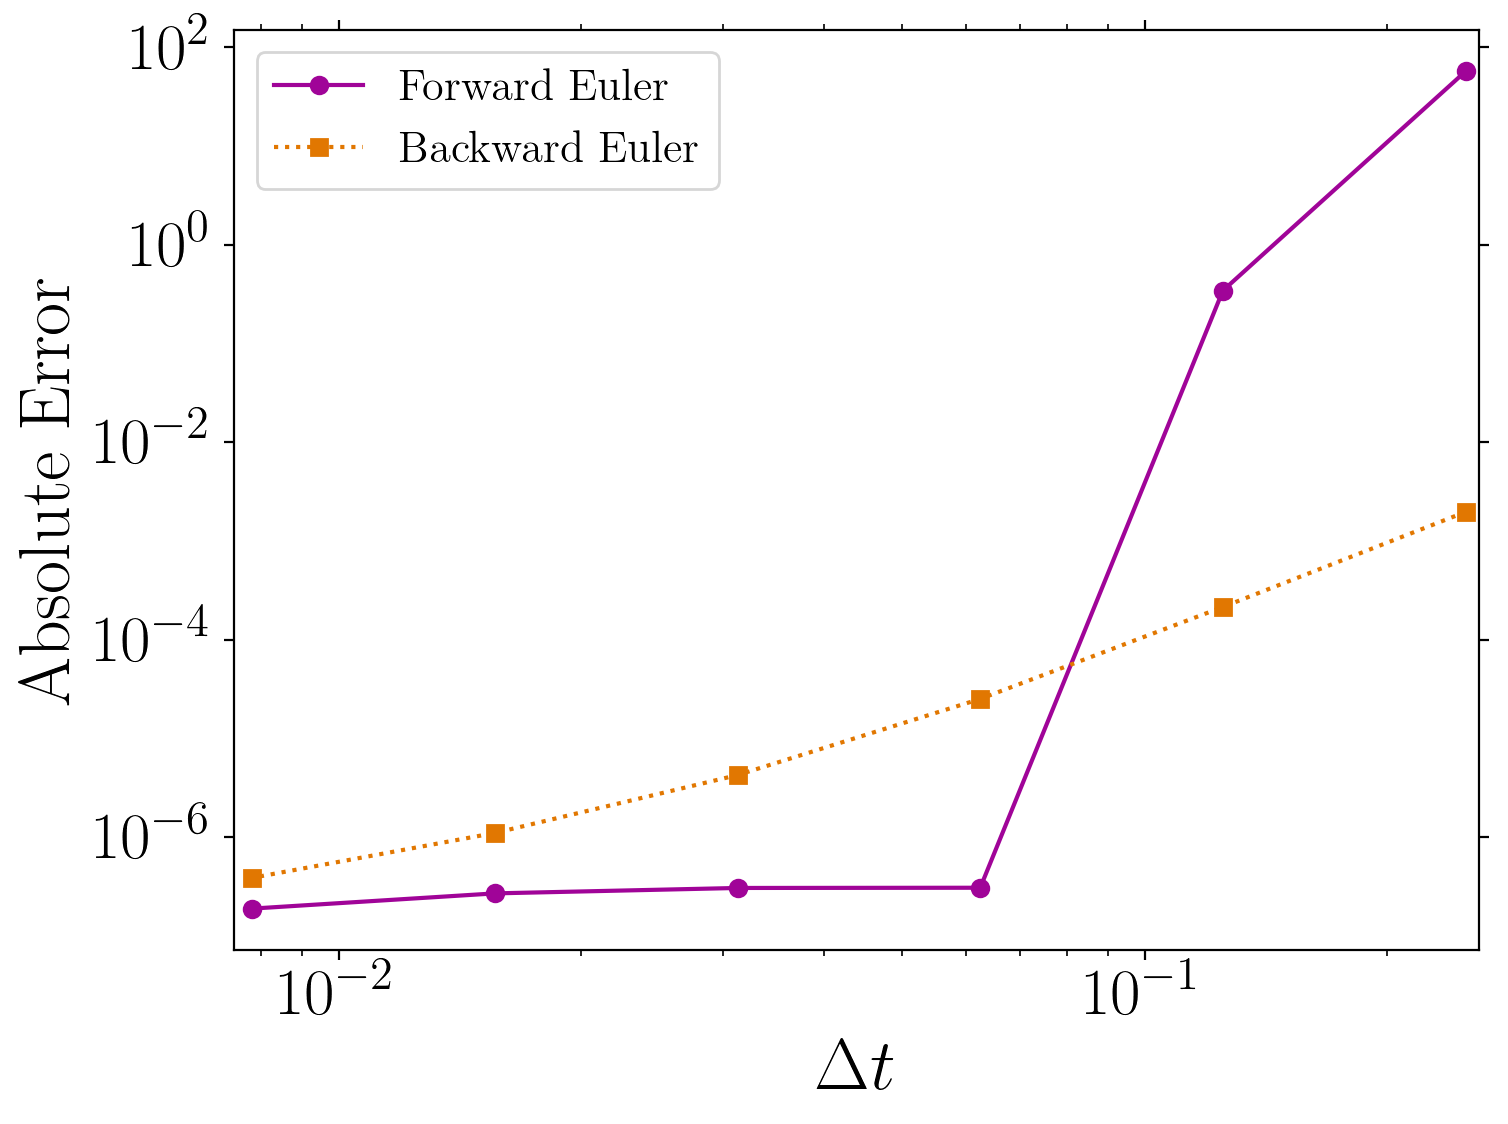

In [16]:
nmax =8

f_errors = np.zeros(nmax-2, dtype=float)
b_errors = np.zeros(nmax-2, dtype=float)

for n in range(2,nmax):
    
    f_errors[n-2] = np.abs(f_euler(1., 2**-n)[-1]-np.exp(-15.))
    b_errors[n-2] = np.abs(b_euler(1., 2**-n)[-1]-np.exp(-15.))

fig, ax = plt.subplots()
    
plt.loglog(2.**(-np.arange(2,nmax)), f_errors, '-o', color='xkcd:barney purple', label='Forward Euler')
plt.loglog(2.**(-np.arange(2,nmax)), b_errors, 's:', color='xkcd:pumpkin', label='Backward Euler')

ax.legend(fontsize=16, loc='best')

plt.xlim([1.9*2**-nmax, 0.26])

textcolor = 'k'

plt.xlabel(r"$\Delta t$", fontsize=26, color = textcolor)
plt.ylabel(r"Absolute Error", fontsize=26, color=textcolor)

plt.tick_params(axis='x', which='both', top='off', color = textcolor)
plt.xticks(fontsize=24, rotation=0, color = textcolor)
plt.tick_params(axis='y', which='both', right='off', color = textcolor)
plt.yticks(fontsize=24, rotation=0, color = textcolor)

plt.tight_layout()

fig.set_size_inches(8, 6)

#plt.savefig('stiff_sim_error_plot'+'.jpg', dpi=700)

plt.show()

 The lesson here is that, while Euler's method does a good job most of the time, *sometimes* it's not so hot (at least, not without taking a very small step size). But, if Euler fails, there are other methods one can try! 
 
Now, you may have noticed that forward Euler only fails here if $\Delta t$ is pretty large: below a certain threshold of $\Delta t$, it does fine. For the particularly simple ODE we're dealing with here, this is not such a big deal, but you should think about *why* a small time-step might cause problems in other applications. 